In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test['Fare'].isnull().sum()

1

In [ ]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [ ]:
for col in df_train.columns:
  msg = 'column: {:>10}\t percent of NaN value:{:.2f}%'.format(
      col, 100 * (df_train[col].isnull().sum() / len(df_train[col])))
  print(msg)

column: PassengerId	 percent of NaN value:0.00%
column:   Survived	 percent of NaN value:0.00%
column:     Pclass	 percent of NaN value:0.00%
column:       Name	 percent of NaN value:0.00%
column:        Sex	 percent of NaN value:0.00%
column:        Age	 percent of NaN value:19.87%
column:      SibSp	 percent of NaN value:0.00%
column:      Parch	 percent of NaN value:0.00%
column:     Ticket	 percent of NaN value:0.00%
column:       Fare	 percent of NaN value:0.00%
column:      Cabin	 percent of NaN value:77.10%
column:   Embarked	 percent of NaN value:0.22%


In [ ]:
for col in df_test.columns:
  msg = '이름: {:>10}\t 결측치 비율: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

이름: PassengerId	 결측치 비율: 0.00%
이름:     Pclass	 결측치 비율: 0.00%
이름:       Name	 결측치 비율: 0.00%
이름:        Sex	 결측치 비율: 0.00%
이름:        Age	 결측치 비율: 20.57%
이름:      SibSp	 결측치 비율: 0.00%
이름:      Parch	 결측치 비율: 0.00%
이름:     Ticket	 결측치 비율: 0.00%
이름:       Fare	 결측치 비율: 0.24%
이름:      Cabin	 결측치 비율: 78.23%
이름:   Embarked	 결측치 비율: 0.00%


<Axes: >

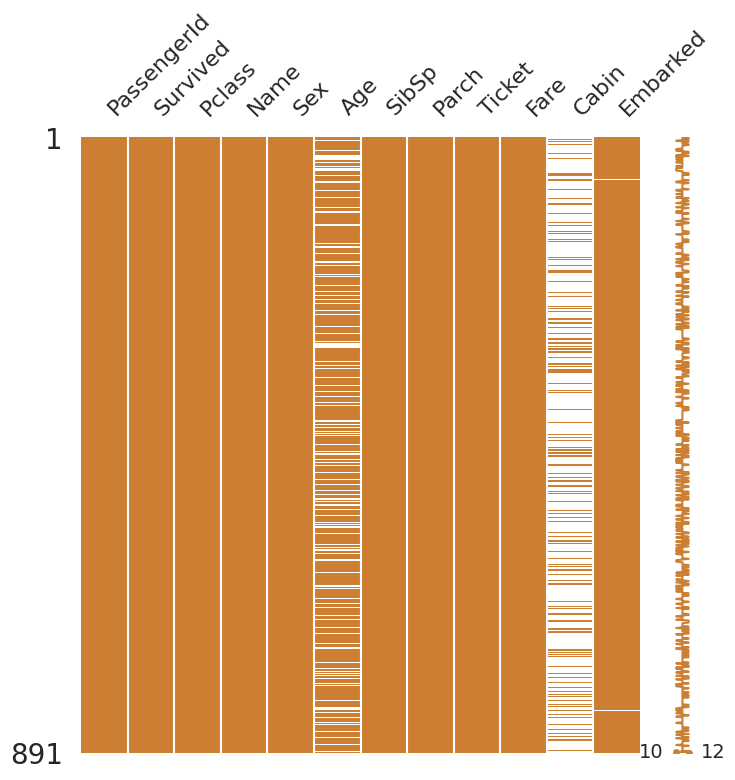

In [ ]:
msno.matrix(df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

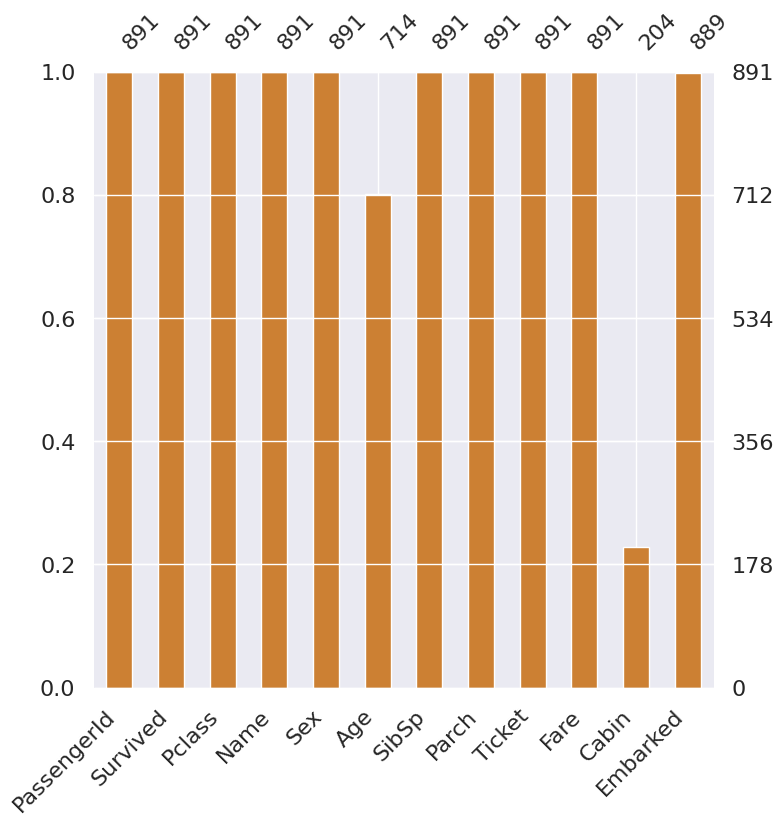

In [ ]:
msno.bar(df = df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

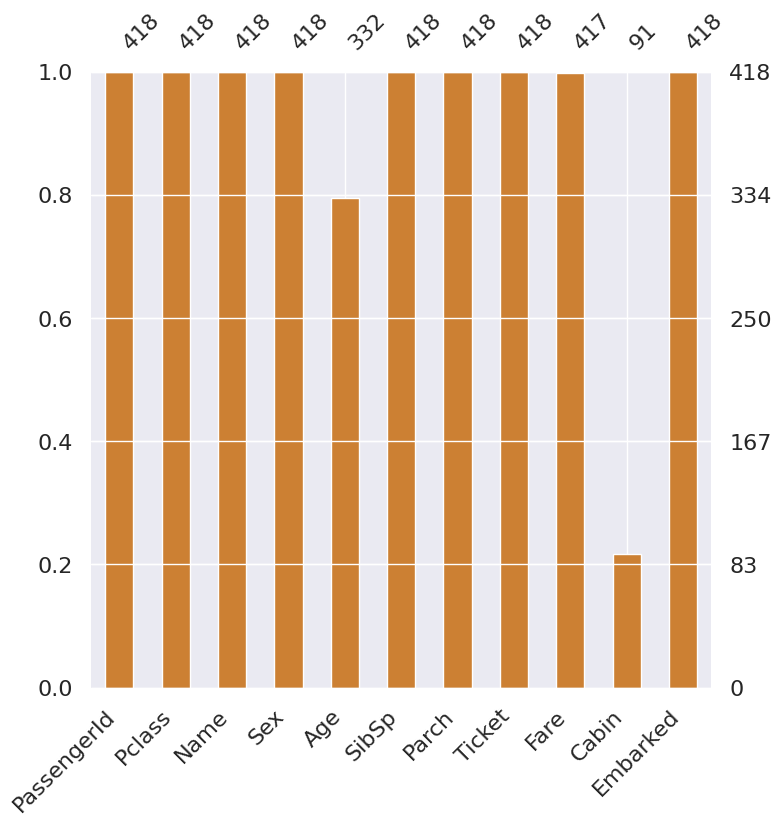

In [ ]:
msno.bar(df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

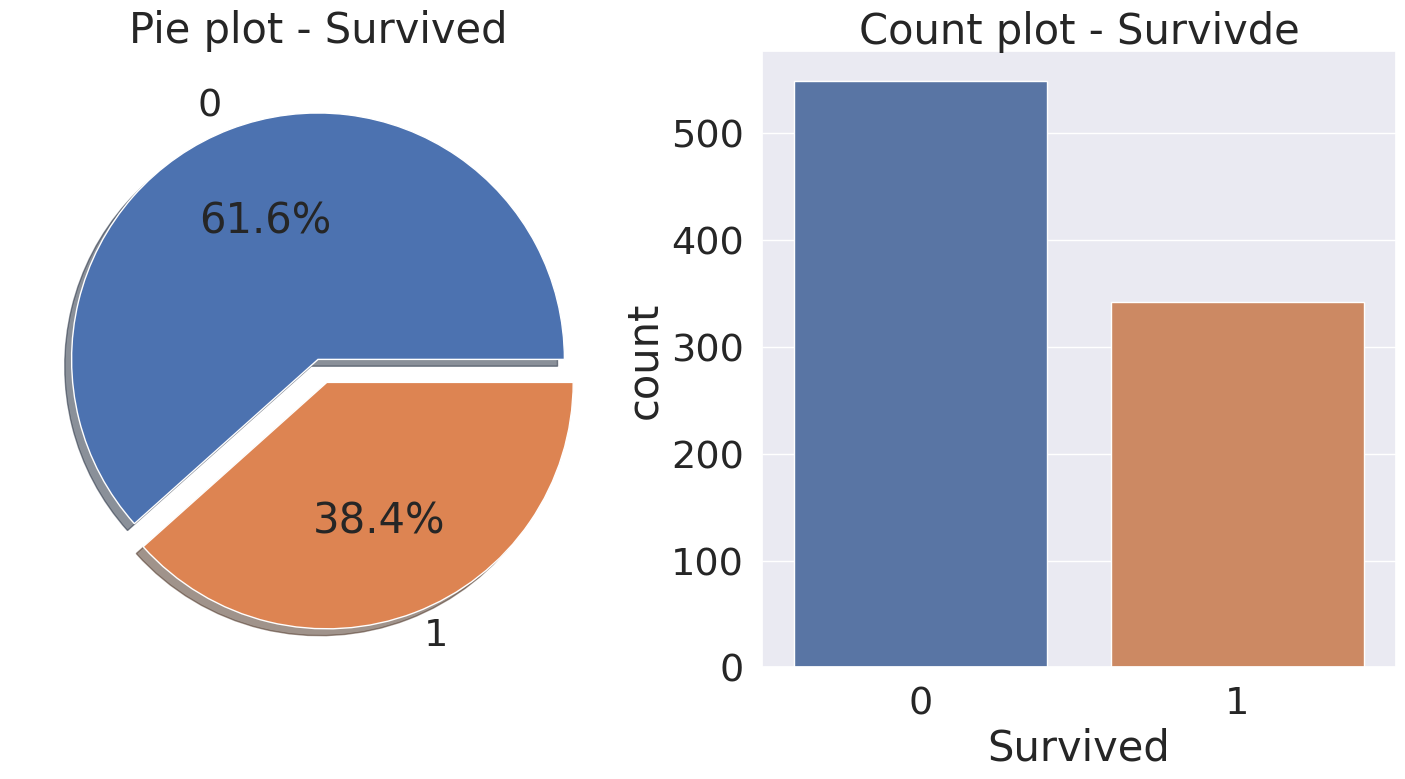

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%0.1f%%',
ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survivde')

plt.show()

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

Survived
Pclass          
1            216
2            184
3            491

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

Survived
Pclass          
1            136
2             87
3            119

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(
cmap='cool')
# pd.crosstab = 교차표를 생성하는 함수 margins=True = 교차표에 합계 행과 열을 추가하라는 옵션이다
# style.background_gradient(cmap='summer_r')는 pandas DataFrame의 스타일을 지정하여 색상 그라데이션을 적용하는 기능입니다.

<Axes: xlabel='Pclass'>

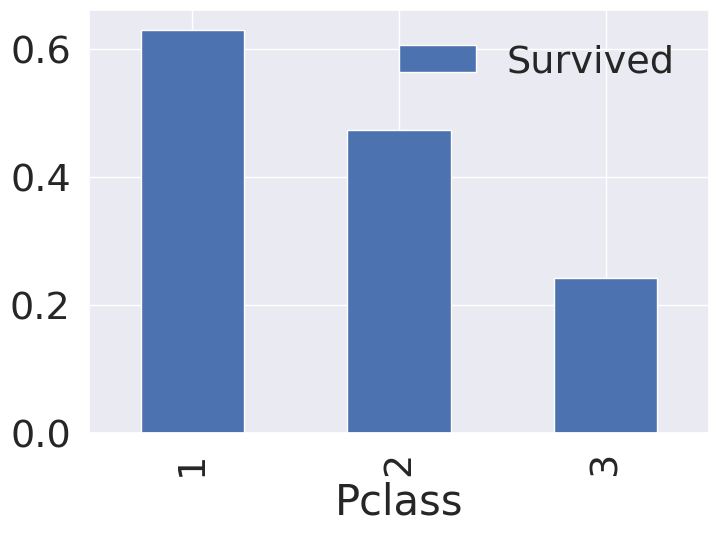

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()
# by='Survived': 'Survived' 열을 기준으로 정렬합니다.
# ascending=False: 내림차순으로 정렬합니다. 즉, 값이 큰 것부터 작은 순으로 정렬됩니다.
# 1이 높을수록 비율이 높고 1이 낮을수록(0이 높을수록) 비율이 낮다.

<Axes: xlabel='Pclass'>

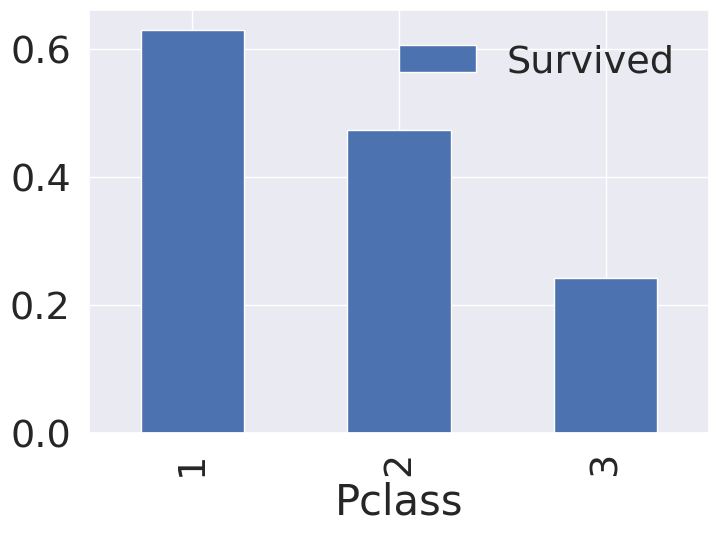

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
# 위의 그래프와 출력이 같다.

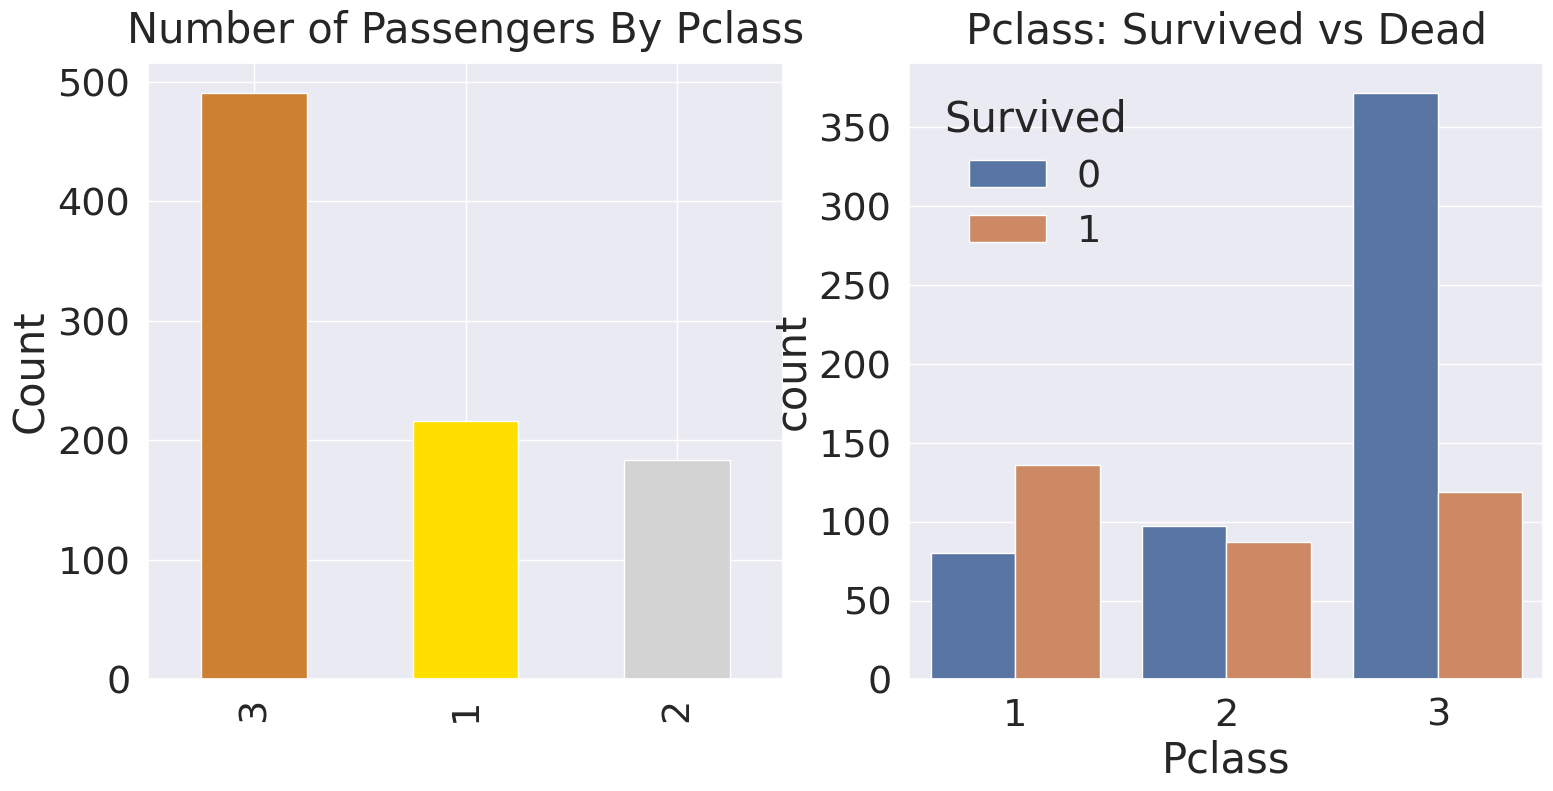

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],
ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()
# sns.countplot = 주어진 데이터셋에서 각 카테고리별로 데이터의 개수를 시각화하는 그래프를 그립니다..
# y_position = 1.02: 그래프의 제목 위치를 조정하기 위해 사용되는 변수입니다.
# hue는 seaborn 라이브러리에서 제공하는 그래프 함수들 중에서 데이터를 추가적인 카테고리로 분할하여 시각화할 수 있는 옵션입니다.

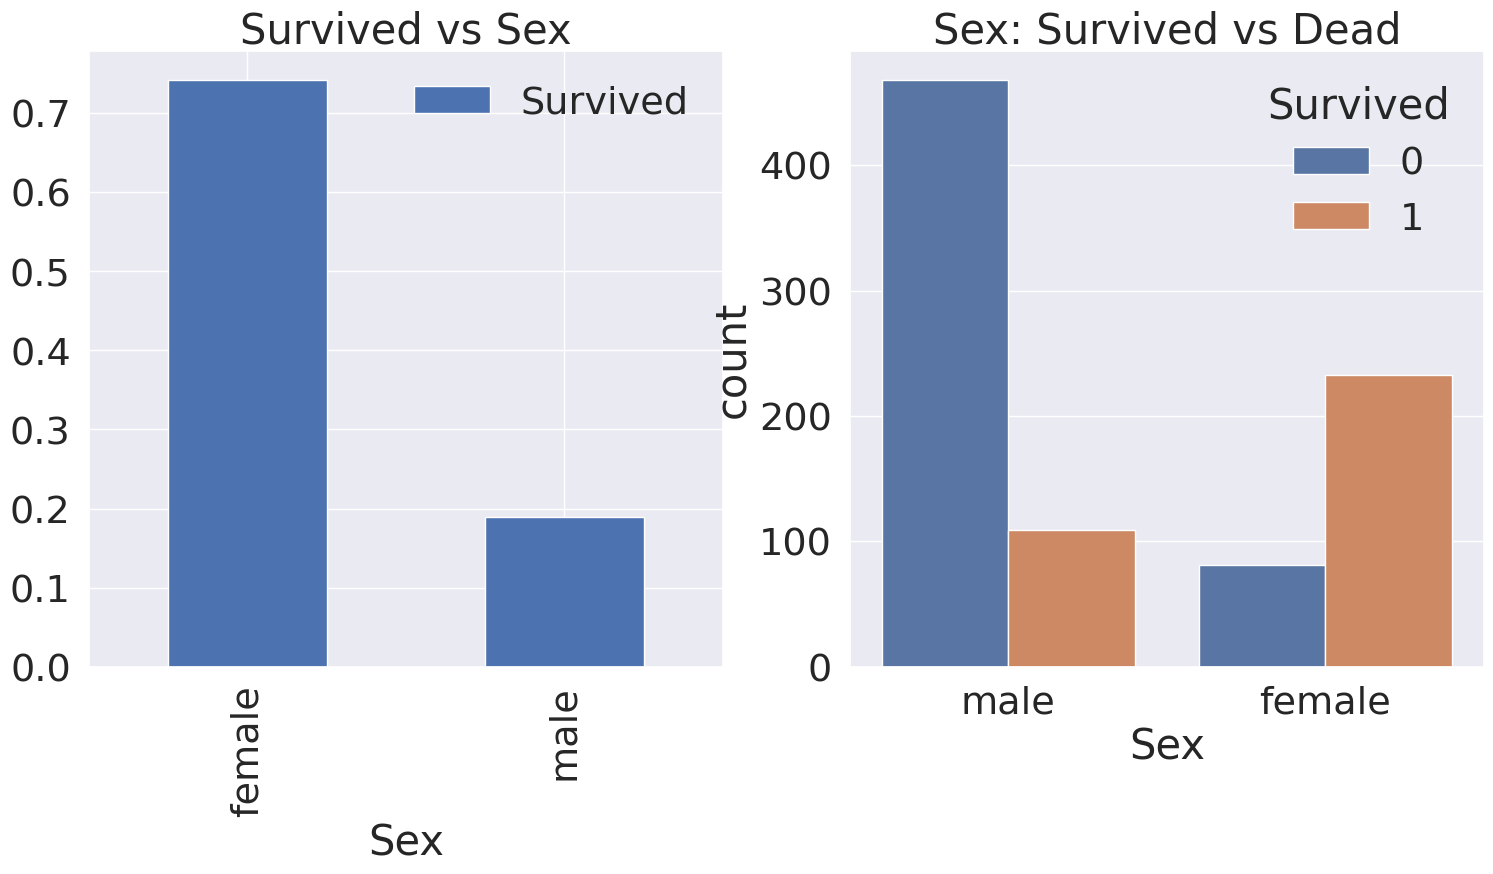

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

Survived
Sex             
female  0.742038
male    0.188908

In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

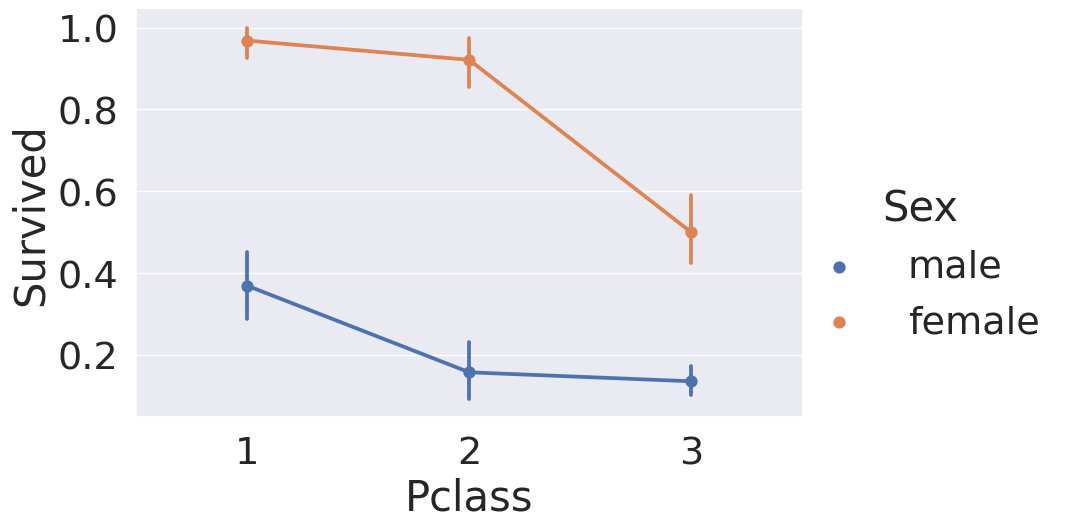

In [ ]:
sns.catplot(data=df_train, x='Pclass', y='Survived', hue='Sex', kind='point',
            height=6, aspect=1.5)
# factorplot은 seaborn 라이브러리의 함수 중 하나로, 범주형 변수에 대한 그래프를 생성하는 데 사용됩니다.

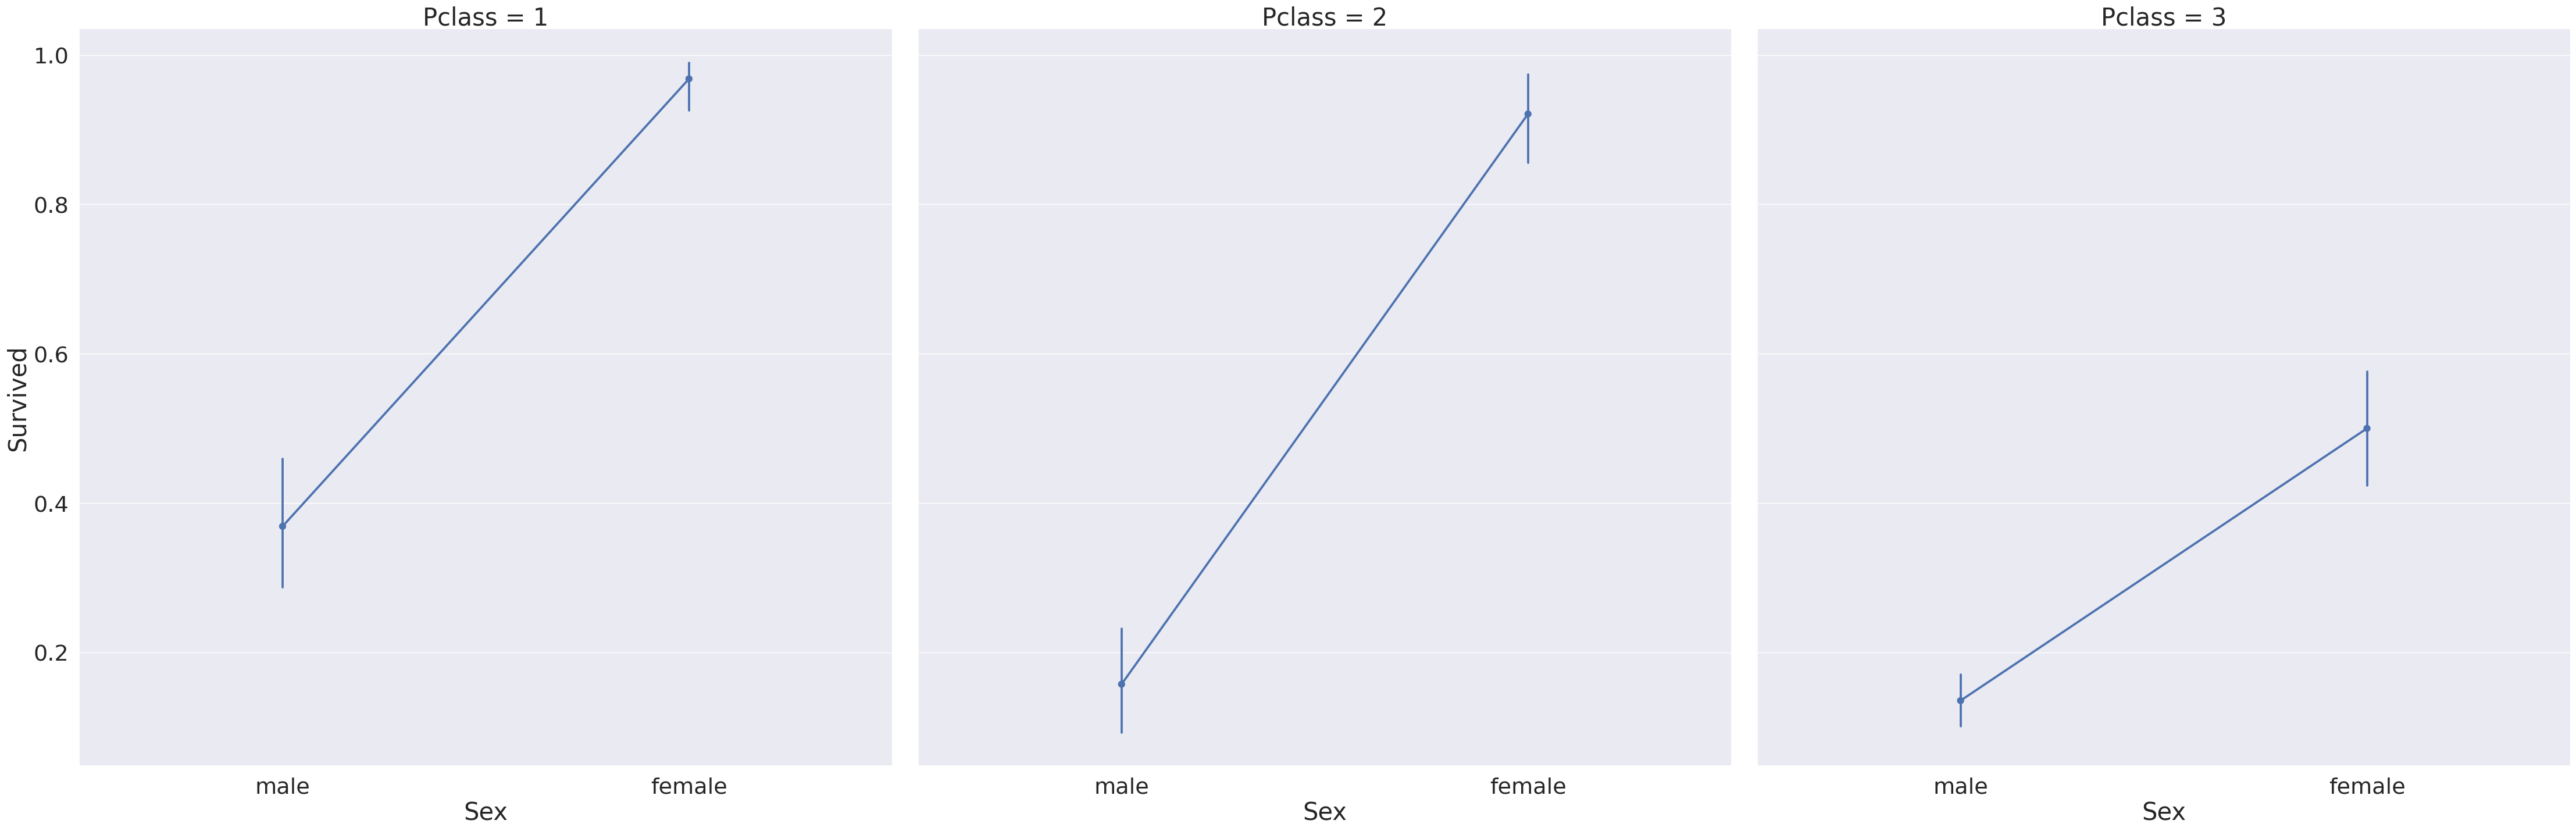

In [ ]:
sns.catplot(data=df_train, x='Sex', y='Survived', col='Pclass', kind='point',
               height=15, aspect=1)

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f}Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7Years


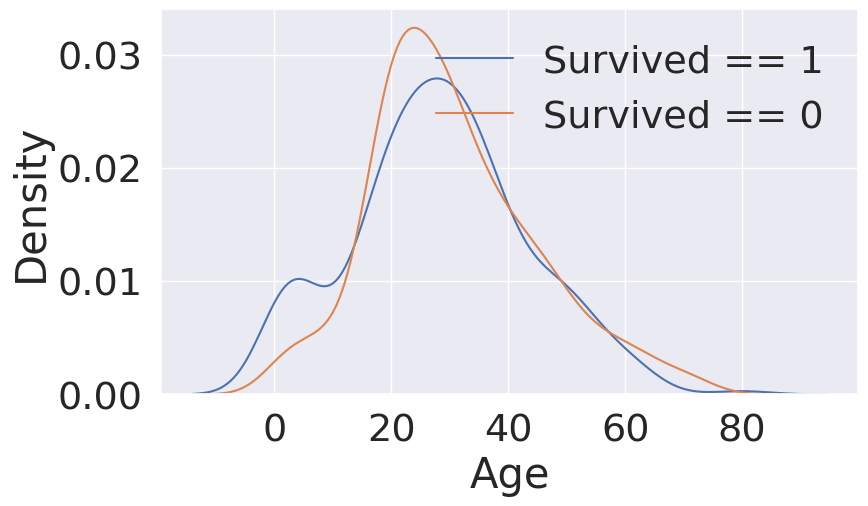

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

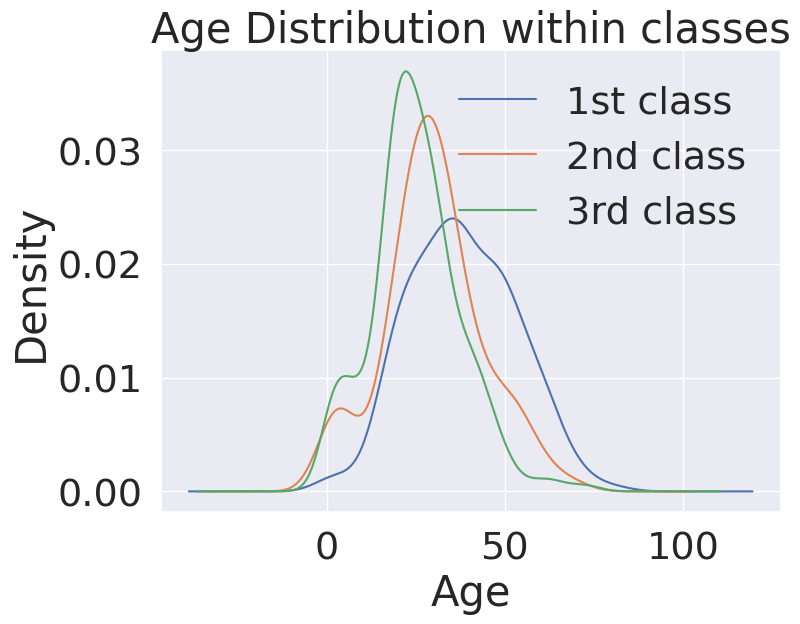

In [ ]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

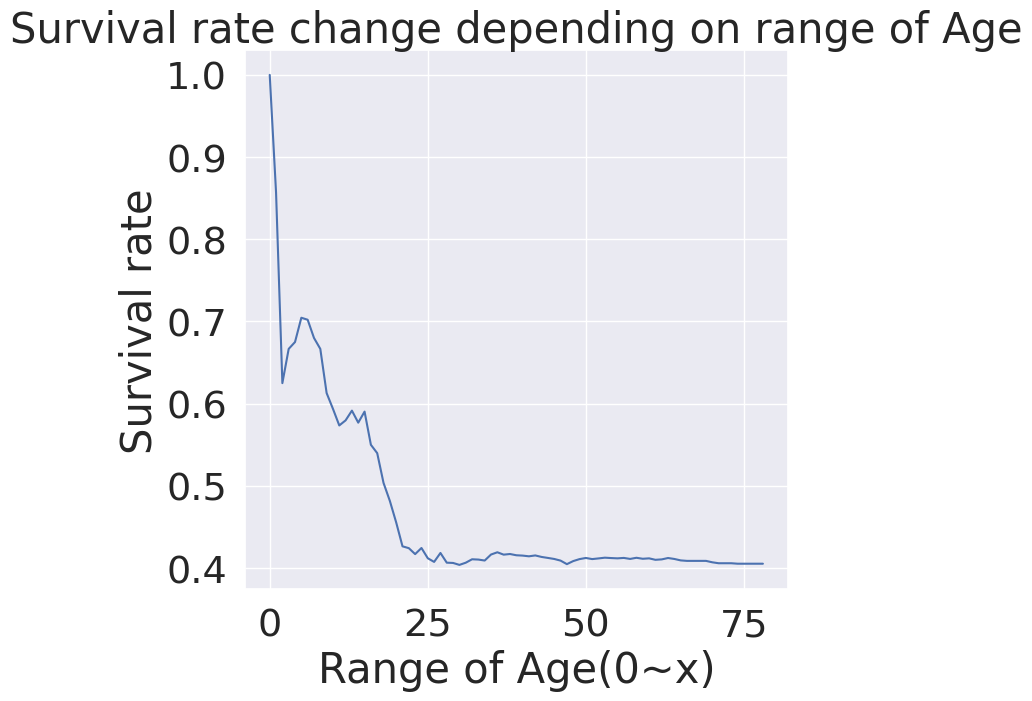

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()
/ len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

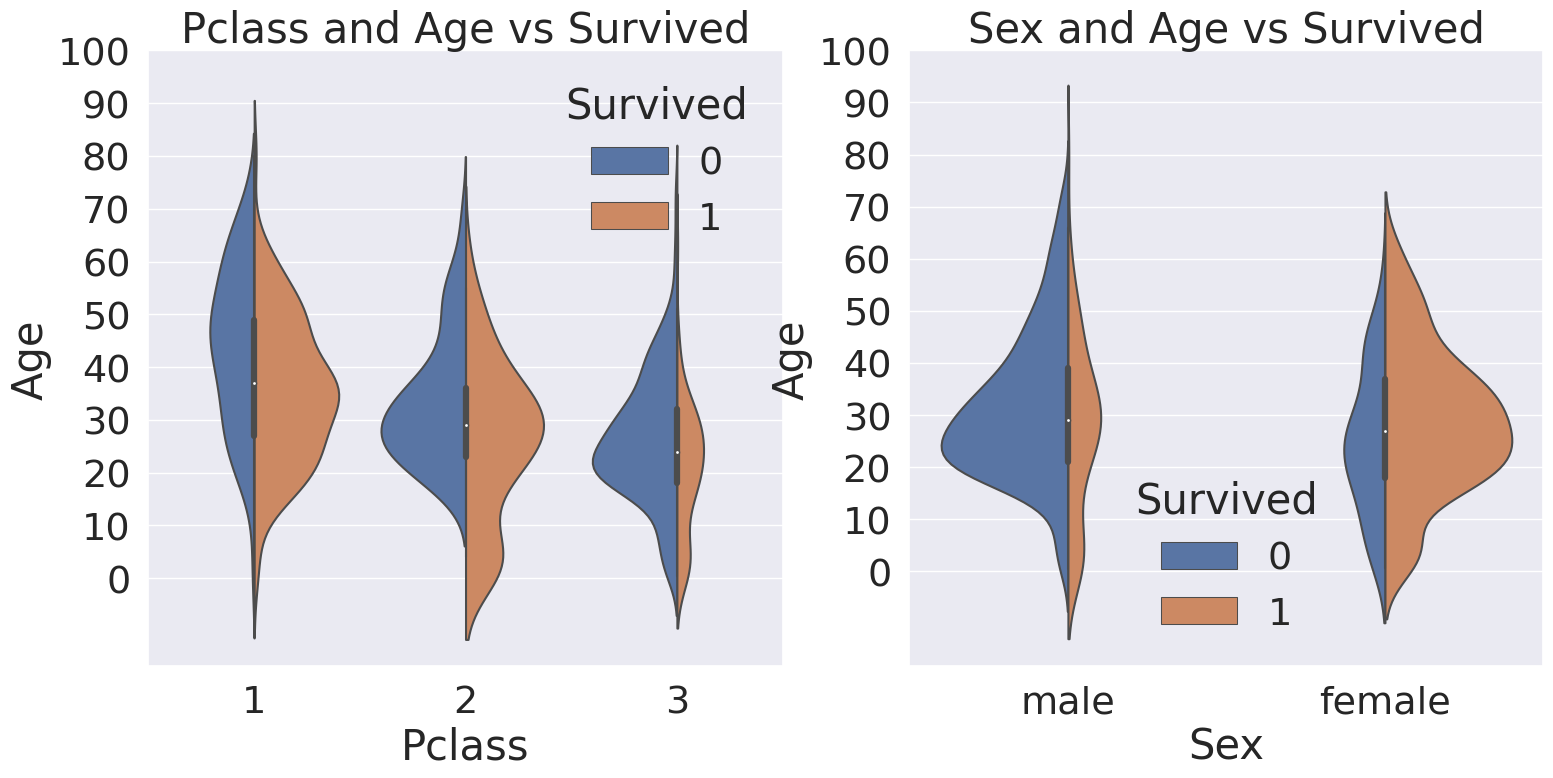

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count',
 split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

<Axes: xlabel='Embarked'>

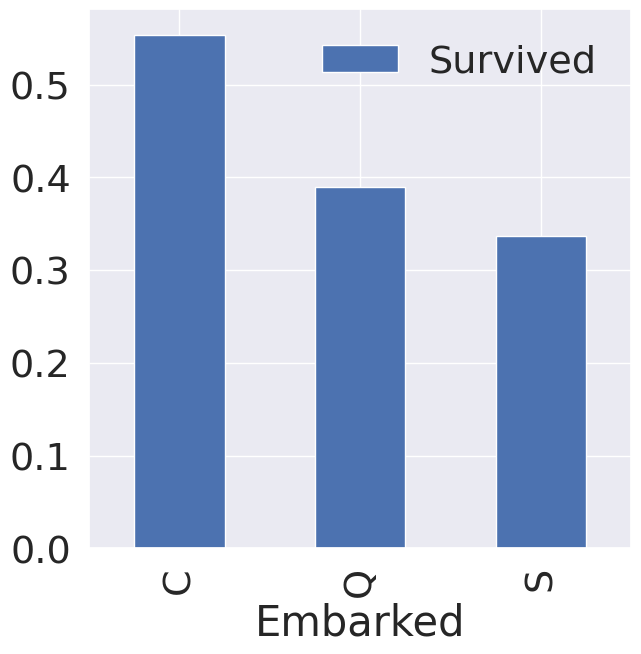

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

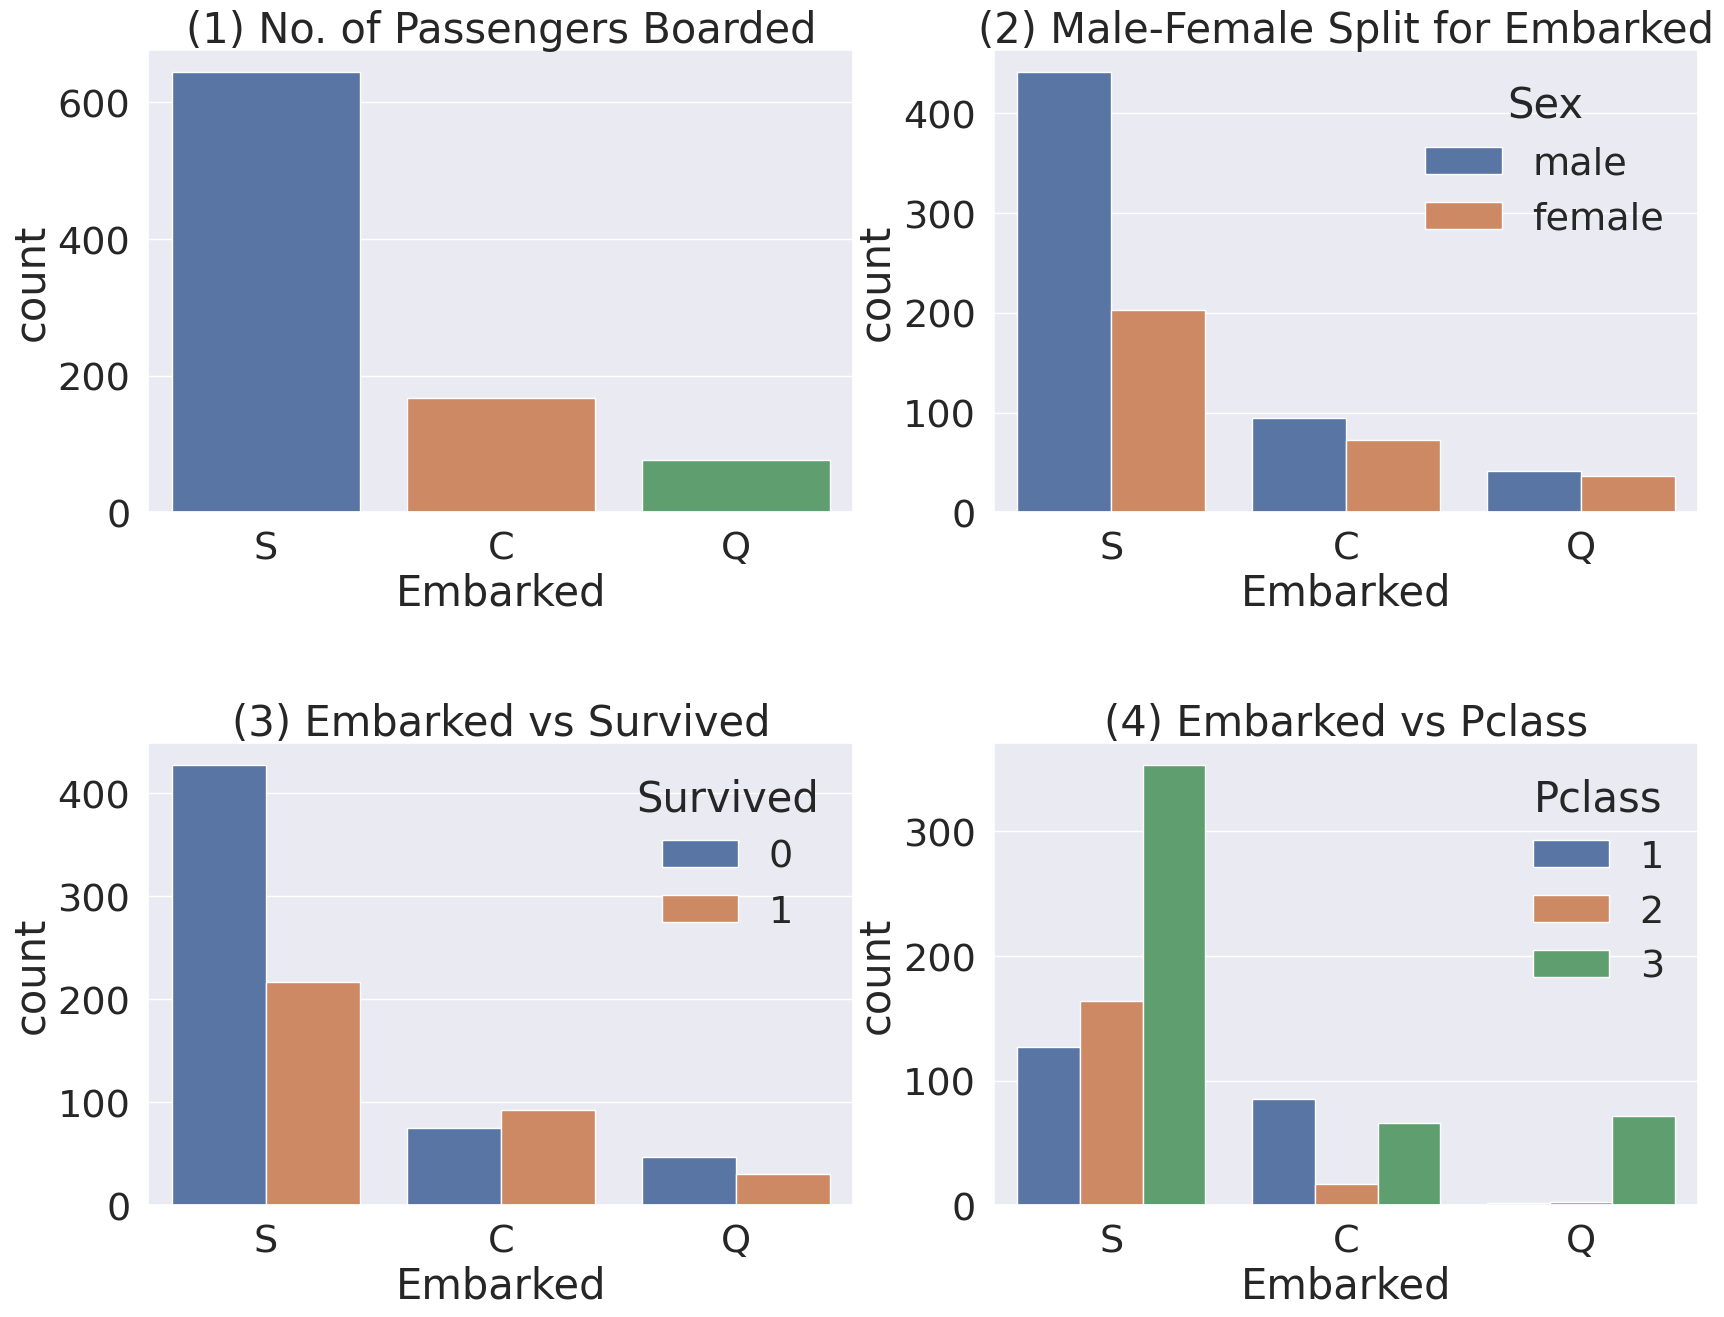

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
print("Maximum size of Family:", df_train['FamilySize'].max())
print("minimum size of Family:", df_train['FamilySize'].min())

Maximum size of Family: 11
minimum size of Family: 1


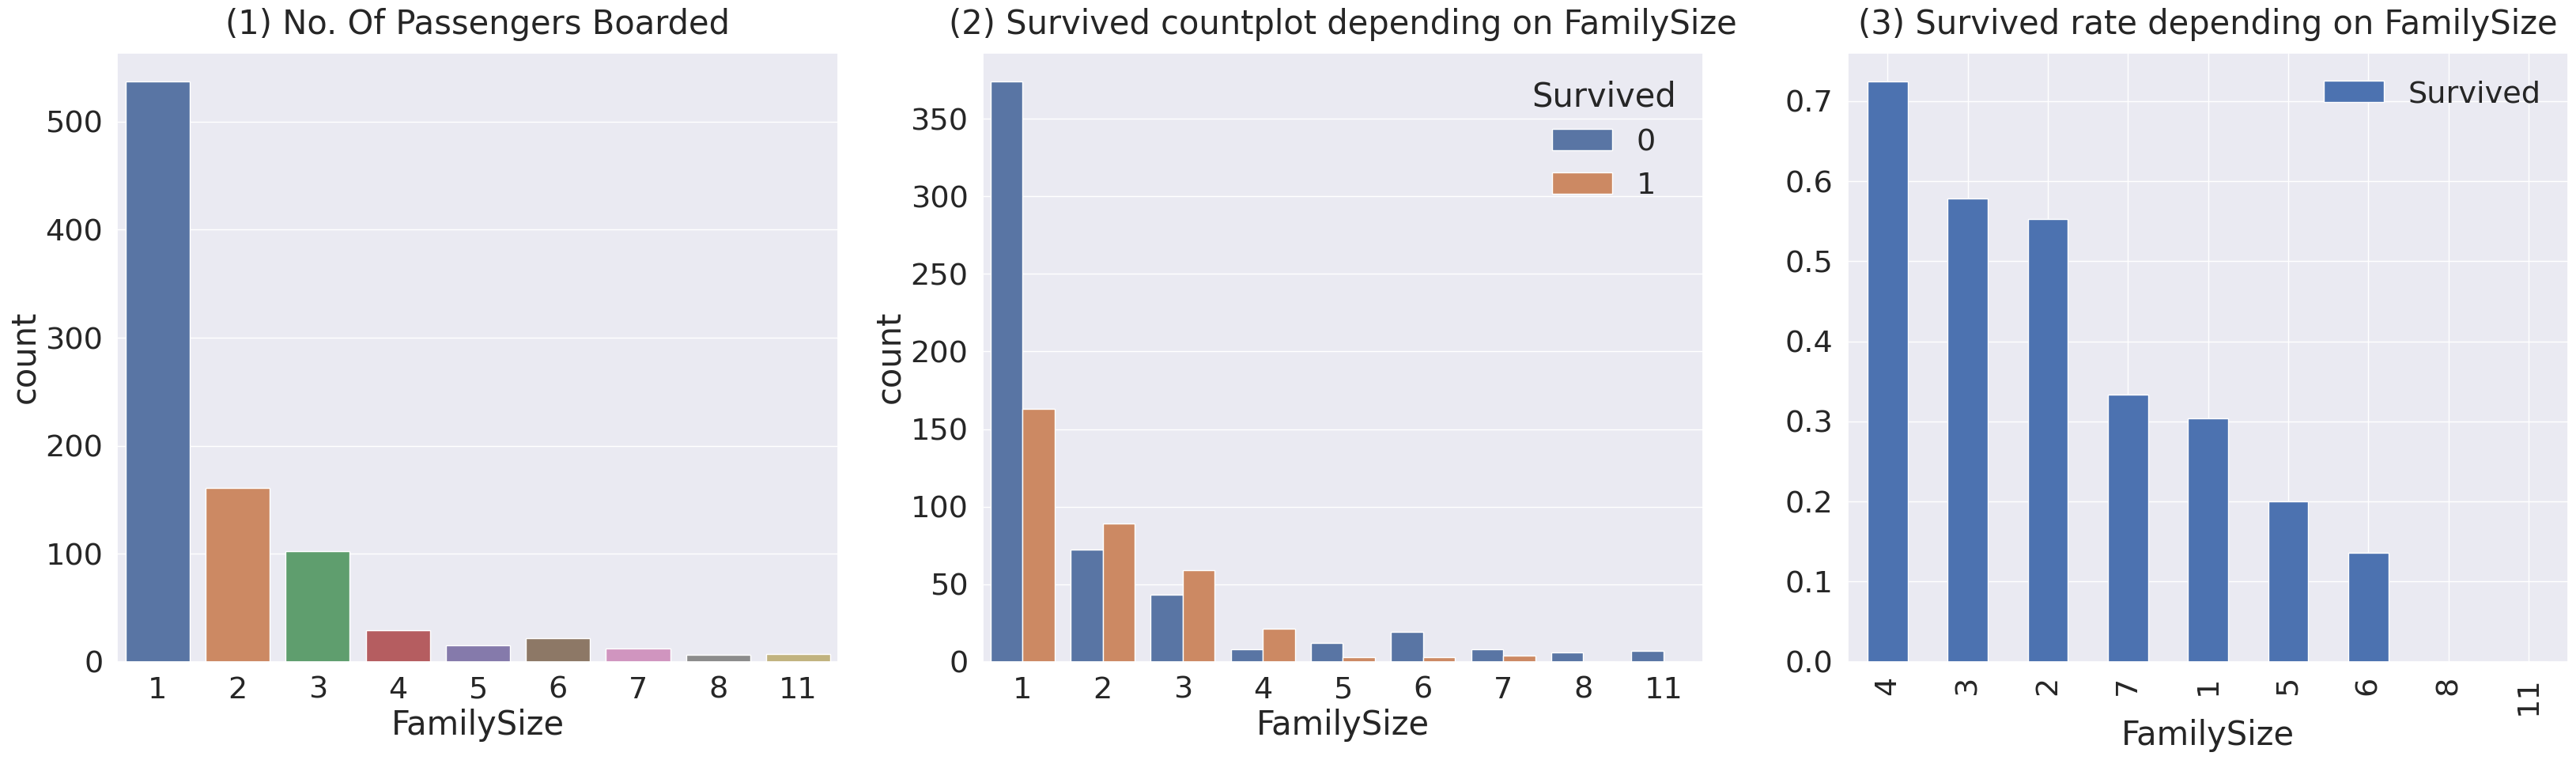

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

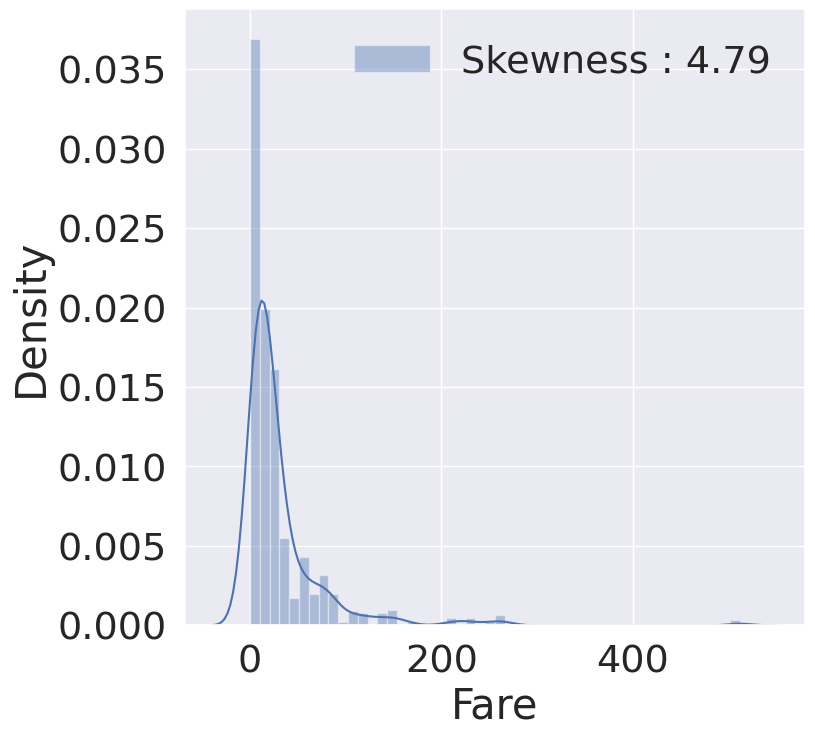

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# skew() 함수는 데이터의 왜도를 계산하는 함수로 왜도는 데이터 분포의 비대칭 정도를 나타내는 지표로, 분포의 좌우 대칭성을 평가하는 데 사용된다. 왜도는 분포가 얼마나 비대칭인지와 왼쪽으로 치우쳐져 있는지 또는 오른쪽으로 치우쳐져 있는지를 측정한다.

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

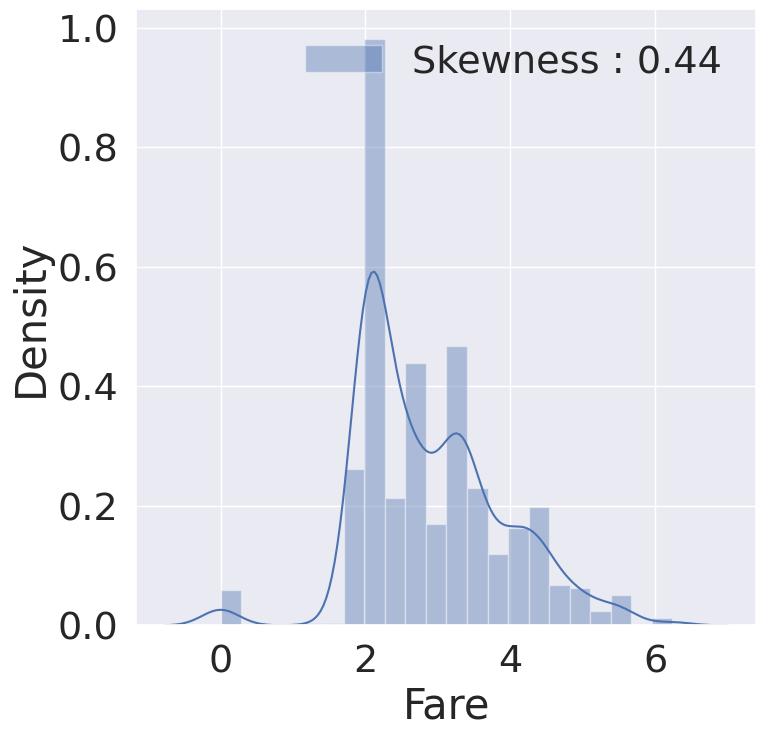

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
df_test['Fare'].isnull().sum()

0

In [ ]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64